In [1]:
# Read the file:
# Deleted the last text column in order to feed the training data to the logistics regeresssion.
library(car)
data <- read.csv('CarMpg.csv', header= TRUE)
head(data)

mpg,cylinders,displacement,HP,weight,acceleration,year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10.0,70,1


In [2]:
dim(data)
print(summary(data))

[1] 398   8

      mpg          cylinders     displacement         HP            weight    
 Min.   : 0.00   Min.   :3.00   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.12   1st Qu.:4.00   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.00   Median :148.5   Median : 94.0   Median :2804  
 Mean   :23.46   Mean   :5.46   Mean   :193.8   Mean   :104.6   Mean   :2972  
 3rd Qu.:29.00   3rd Qu.:8.00   3rd Qu.:265.8   3rd Qu.:129.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.00   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                NA's   :5                     
  acceleration        year        origin     
 Min.   : 8.00   Min.   :70   Min.   :1.000  
 1st Qu.:13.80   1st Qu.:73   1st Qu.:1.000  
 Median :15.50   Median :76   Median :1.000  
 Mean   :15.55   Mean   :76   Mean   :1.573  
 3rd Qu.:17.07   3rd Qu.:79   3rd Qu.:2.000  
 Max.   :24.80   Max.   :82   Max.   :3.000  
                                             


# Problem 1
- First create a binary variable that indicates if the particular
- car’s MPG is equal to or above (1) or below (0) the median MPG for this dataset.  

In [3]:
# MPG is our Y and all other ar X variables
data$mpg <- data$mpg > 23

In [4]:
# so above 23 will 1 and below will be 0 binary variables.
data$mpg <- as.numeric(data$mpg)
head(data)

mpg,cylinders,displacement,HP,weight,acceleration,year,origin
0,8,307,130,3504,12.0,70,1
0,8,350,165,3693,11.5,70,1
0,8,318,150,3436,11.0,70,1
0,8,304,150,3433,12.0,70,1
0,8,302,140,3449,10.5,70,1
0,8,429,198,4341,10.0,70,1


# so we have converted the below 23 as 0 and other 1

- Probelm 2
- Then create visual representations of the relationship between mpg_binary and other variables.
- For the Origin variable, the labels are: 1=American, 2=German, 3=Japanese.  Please use this information appropriately in your analysis.  


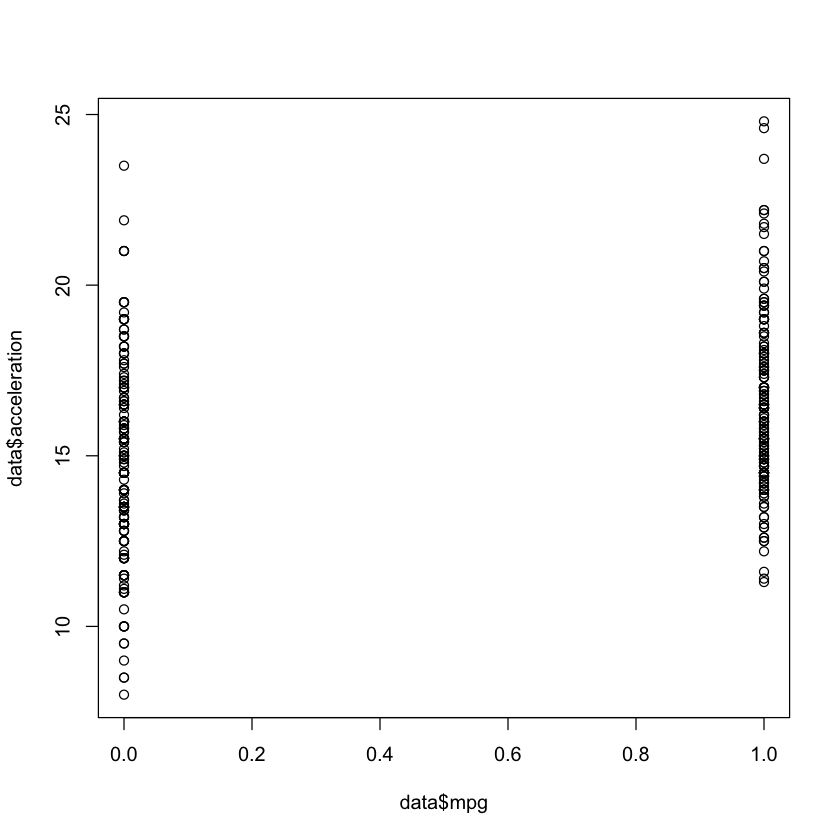

In [5]:
plot(data$mpg,data$acceleration)
# acceleration for MPG 1 is more than 0

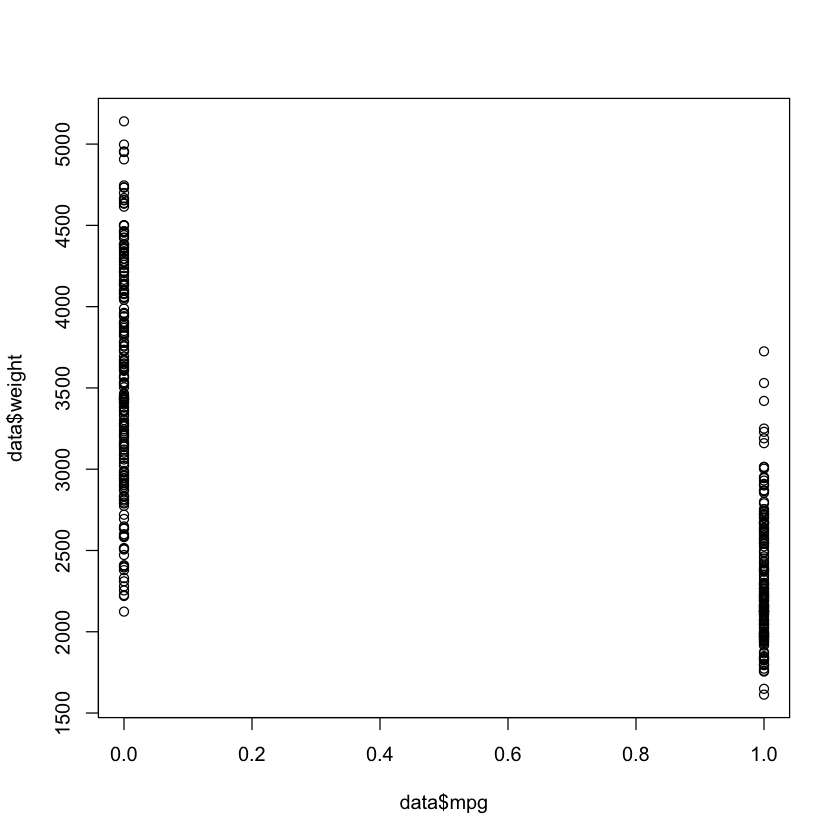

In [6]:
plot(data$mpg,data$weight)
# WEIGHT IS MORE FOR THE BELOW 23 MPG CARS


  0   1 
207 191 


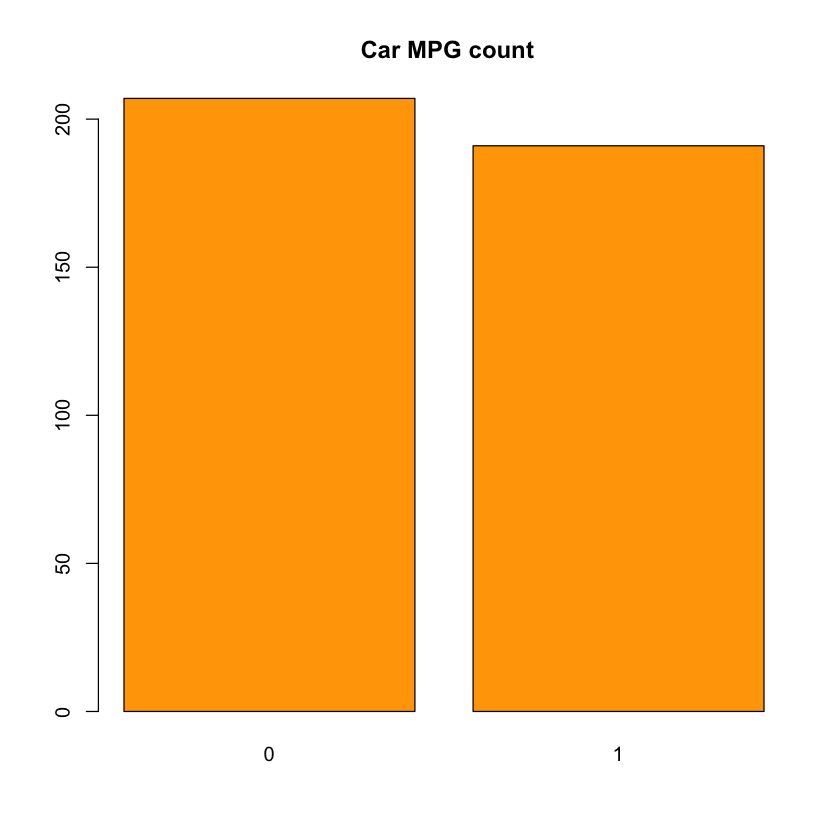

In [7]:
count = table(data$mpg)
print(count) # well distrubuted data
barplot(count,main=" Car MPG count", col='orange')
# below 23 we have 206 cars
# above 23 we have 191 cars

In [8]:
cor(data, method = 'pearson')

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin
mpg,1.0000000,-0.7401421,-0.7392323,NA,-0.7460548,0.3239004,0.4512327,0.5122000
cylinders,-0.7401421,1.0000000,0.9504177,NA,0.8969395,-0.5042346,-0.3457315,-0.5651088
displacement,-0.7392323,0.9504177,1.0000000,NA,0.9330861,-0.5450229,-0.3670100,-0.6113004
HP,NA,NA,NA,1,NA,NA,NA,NA
weight,-0.7460548,0.8969395,0.9330861,NA,1.0000000,-0.4202499,-0.3061225,-0.5817606
acceleration,0.3239004,-0.5042346,-0.5450229,NA,-0.4202499,1.0000000,0.2808410,0.2111969
year,0.4512327,-0.3457315,-0.3670100,NA,-0.3061225,0.2808410,1.0000000,0.1825759
origin,0.5122000,-0.5651088,-0.6113004,NA,-0.5817606,0.2111969,0.1825759,1.0000000


In [9]:
# This is correlation matrix for the MPG. 
# the best one is Origin and year and then Acceleration having good correlation with Y.

# Problem 3
- a.	Lastly, estimate and interpret the Logistic Regression model using mpg_binary as the dependent variable and the others as independent variables. 
- Find the ‘best’ model with the given predictors.  
- Your answer to the Logistic Regression part should at least include the following: 
- reference p-values and explain significance/insignificance; interpret the coefficients or Odds Ratios;
- Pick a good threshold for your prediction cutoff and find the sensitivity and specificity of the model using that threshold; and use the above estimates to predict the probability of being above or below the Median MPG for the following car features:


In [10]:
# Dependentd Variable: MPG
# All other variables are Independent

In [11]:
# we dont have the more data to divide the train and test model but lets start and divide the data
train <- data[1:355,]
print(dim(train))
test <- data[356:398,]
print(dim(test))

[1] 355   8
[1] 43  8


In [12]:
model <- glm(mpg~., family = binomial(link=logit), data=train)
summary(model)


Call:
glm(formula = mpg ~ ., family = binomial(link = logit), data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.29656  -0.11134  -0.00144   0.16217   2.39467  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -19.716331   7.193577  -2.741 0.006129 ** 
cylinders     -0.020363   0.494781  -0.041 0.967172    
displacement  -0.005292   0.015521  -0.341 0.733144    
HP            -0.043172   0.026983  -1.600 0.109601    
weight        -0.004611   0.001374  -3.357 0.000789 ***
acceleration  -0.079533   0.149231  -0.533 0.594067    
year           0.500991   0.099302   5.045 4.53e-07 ***
origin         0.289269   0.379516   0.762 0.445937    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 477.45  on 349  degrees of freedom
Residual deviance: 130.32  on 342  degrees of freedom
  (5 observations deleted due to missingness)


In [13]:
# In our model we can see the cutoff value 0.05
# Weight and Accelaration are only significant variables. P values < 0.05
# Accelaration will reduce log odds by 0.07 when we'll increase accelration by one unit.
# Year will increase log odds of 0.50 when ww will increase year by one unit.

In [14]:
# testing our model
fitted_results <- predict(model, newdata= test,select=c(2,3,4,5,6,7,8), type= 'response')
fitted_results # we can see the probabilities

356         357         358         359         360         361 
0.998514222 0.996559189 0.969769700 0.985439862 0.655822389 0.758034111 
        362         363         364         365         366         367 
0.792200673 0.740429404 0.125221522 0.016586627 0.668962553 0.244710642 
        368         369         370         371         372         373 
0.973663870 0.971481452 0.991037595 0.984455542 0.986826770 0.945070337 
        374         375         376         377         378         379 
0.912526214 0.999575760 0.999647119 0.999738903 0.999344537 0.998949637 
        380         381         382         383         384         385 
0.998646758 0.999112685 0.998953928 0.999801271 0.999789896 0.999748948 
        386         387         388         389         390         391 
0.719343262 0.772303663 0.975930292 0.773365020 0.979176294 0.994880831 
        392         393         394         395         396         397 
0.870961376 0.953174451 0.999341954 0.996753129 0.980990906 0.965032369 
        398 
0.003768669

In [15]:
# cutoff value 0.50
fitted_results <- ifelse(fitted_results >0.5,1,0)
fitted_results

356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 
  1   1   1   1   1   1   1   1   0   0   1   0   1   1   1   1   1   1   1   1 
376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
396 397 398 
  1   1   0

In [16]:
# record 398 is our test record. so our model predicted the 0 for the last record. below 23 average
tail(data)
# we can see the last record with No mpg.

,mpg,cylinders,displacement,HP,weight,acceleration,year,origin
393,1,4,140,86,2790,15.6,82,1
394,1,4,97,52,2130,24.6,82,2
395,1,4,135,84,2295,11.6,82,1
396,1,4,120,79,2625,18.6,82,1
397,1,4,119,82,2720,19.4,82,1
398,0,6,297,155,3530,13.4,79,1


In [17]:
misclassification <- mean(fitted_results != test$mpg)
print(paste('Accuracy',1-misclassification))

[1] "Accuracy 0.930232558139535"



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.9473684

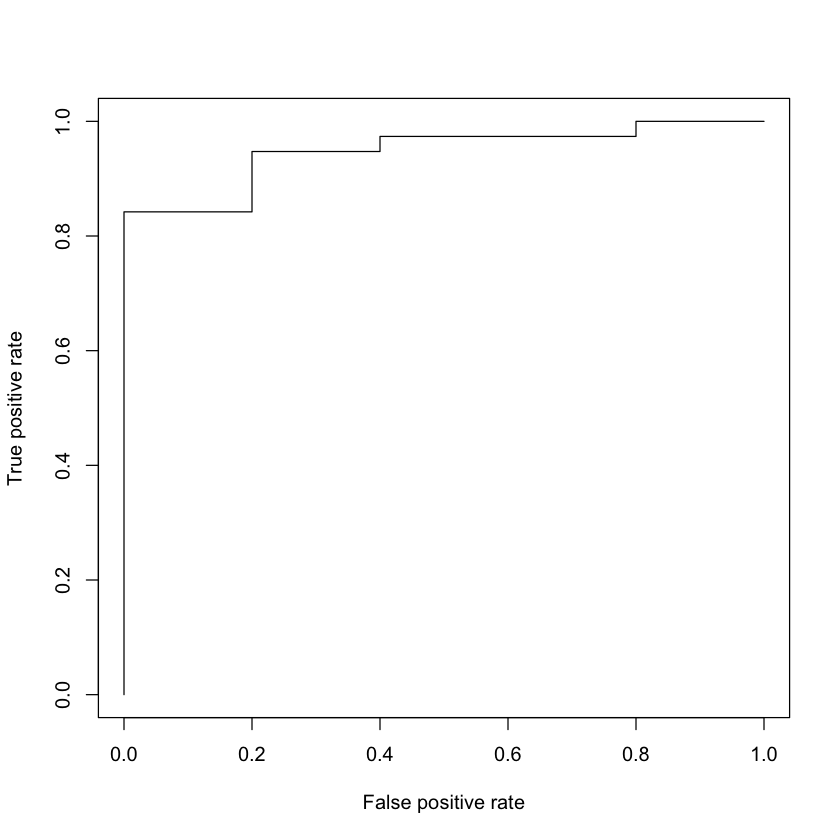

In [18]:
library(gplots)
library(ROCR)
p <- predict(model, newdata=subset(test,select=c(2,3,4,5,6,7,8)), type="response")
pr <- prediction(p, test$mpg)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc[1]

# AUC is 93 Percent
# Accuracy is 93 Percent
# IN above ROCR plot, we can see the AUC and false Poitive rate and True positive rate.
# our one record prediction is 0 that means below 23